In [1]:
import pandas as pd
import io
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz

In [2]:
# Define function to mapping plot filename
map_plot_filename = lambda filename: '_'.join(list(map(str.lower, filename.split(' '))))

# LPF - Direct Method

In [3]:
# Section 1 - Low Pass Filter - Direct method accelerometer signal at Ax,Ay,Az axis

# Import dataset
df = pd.read_excel('Acceleration.xls')
print(df)

df['Ax'] = df['x']-sum(df['x'])/df['x'].count()
df['Ay'] = df['y']-sum(df['y'])/df['y'].count()
df['Az'] = df['z']-sum(df['z'])/df['z'].count()

        Time (s)         x         y         z  Absolute acceleration (m/s^2)
0       0.107483 -0.029362  0.061286 -0.126186                       0.143322
1       0.112461 -0.023239  0.058102 -0.096515                       0.115026
2       0.117450 -0.035597  0.052994 -0.068706                       0.093787
3       0.122456 -0.024858  0.041243 -0.058440                       0.075724
4       0.127473 -0.028323  0.029933 -0.057974                       0.071128
...          ...       ...       ...       ...                            ...
11945  59.983437 -0.002734 -0.072734  0.079426                       0.107732
11946  59.988450 -0.004960 -0.078976  0.071668                       0.106761
11947  59.993463  0.018914 -0.080692  0.066319                       0.106146
11948  59.998476  0.018969 -0.058818  0.070492                       0.093747
11949  60.003488  0.030849 -0.077764  0.053221                       0.099153

[11950 rows x 5 columns]


In [4]:
#Assign dataset ke masing-masing kolom/variabel A,B,C

A = df.iloc[:, 0] #index
Ax = df.iloc[:, 1] #sumbu X
Ay = df.iloc[:, 2] #sumbu Y
Az = df.iloc[:, 3] #sumbu Z

#karena datanya banyak, saya ambil 1000 data saja
#B_1000 = B[1 : 1000]
#C_1000 = C[1 : 1000]
#D_1000 = D[1 : 1000]

In [5]:
# https://stackoverflow.com/questions/25191620/
# Low Pass Filter Code

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 30.0   # sample rate, per data
cutoff = 0.8  # cutoff frequency yang diinginkan dari filter

# ambil koefisiensi filter.
b, a = butter_lowpass(cutoff, fs, order)

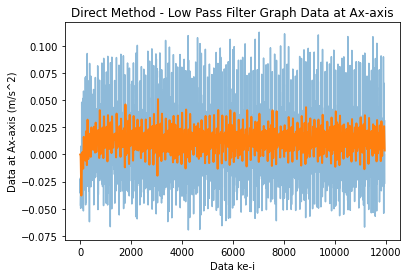

In [6]:
# Plotting LPF graph Ax-axis

plot_name = f'Direct Method - Low Pass Filter Graph Data at Ax-axis'
plt.xlabel('Data ke-i')
plt.ylabel('Data at Ax-axis (m/s^2)')
plt.title(plot_name)
y = butter_lowpass_filter(Ax, cutoff, fs, order)
plt.plot(Ax, label='Ax', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')
plt.savefig(map_plot_filename(plot_name))

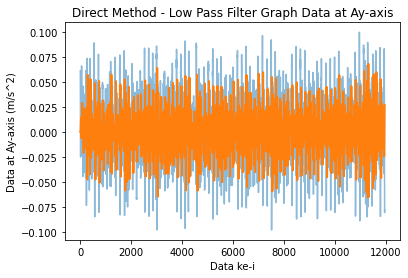

In [7]:
# Plotting LPF graph Ay-axis

plot_name = f'Direct Method - Low Pass Filter Graph Data at Ay-axis'
plt.xlabel('Data ke-i')
plt.ylabel('Data at Ay-axis (m/s^2)')
plt.title(plot_name)
y = butter_lowpass_filter(Ay, cutoff, fs, order)
plt.plot(Ay, label='Ay', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')
plt.savefig(map_plot_filename(plot_name))

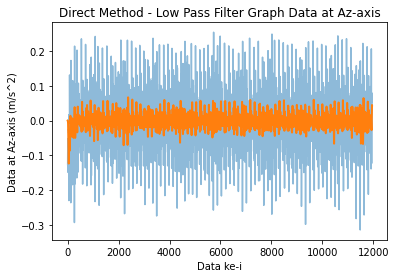

In [8]:
# Plotting LPF graph Az-axis

plot_name = f'Direct Method - Low Pass Filter Graph Data at Az-axis'
plt.xlabel('Data ke-i')
plt.ylabel('Data at Az-axis (m/s^2)')
plt.title(plot_name)
y = butter_lowpass_filter(Az, cutoff, fs, order)
plt.plot(Az, label='Az', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')
plt.savefig(map_plot_filename(plot_name))

# LPF - Inklinasi Method

In [9]:
# Section 2 - Low Pass Filter - Inklinasi method accelerometer signal at Ax,Ay,Az axis

# Define accelerometer rho angle computation function
# With formula :
# Arctan(Ax / sqrt(Ay^2 + Az^2))
rho_angle_func = lambda Ax,Ay,Az: math.atan(Ax/ math.sqrt(math.pow(Ay, 2) + math.pow(Az, 2)))

# Perform calculation with map and functional way
accelerometer_rho_angle = list(map(rho_angle_func, df['Ax'].to_numpy(), 
                                                   df['Ay'].to_numpy(), 
                                                   df['Az'].to_numpy()))

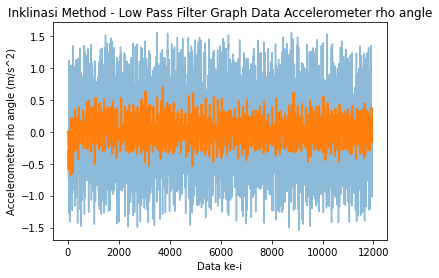

In [11]:
# Plotting LPF graph accelerometer rho angle

plot_name = f'Inklinasi Method - Low Pass Filter Graph Data Accelerometer rho angle'
plt.xlabel('Data ke-i')
plt.ylabel('Accelerometer rho angle (m/s^2)')
plt.title(plot_name)
y = butter_lowpass_filter(accelerometer_rho_angle, cutoff, fs, order)
plt.plot(accelerometer_rho_angle, label='accelerometer_rho_angle', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')
plt.savefig(map_plot_filename(plot_name))